<a href="https://colab.research.google.com/github/Hritik003/Optimization-of-OWC-using-ML-models/blob/main/Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from math import sqrt

data = pd.read_csv('./Data_simple_OWC.csv')

X = data.drop('P_OWC', axis=1).values
y = data['P_OWC'].values

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [3]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error

In [5]:
random_forest_model = RandomForestRegressor(n_estimators=500, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


## Random Forest

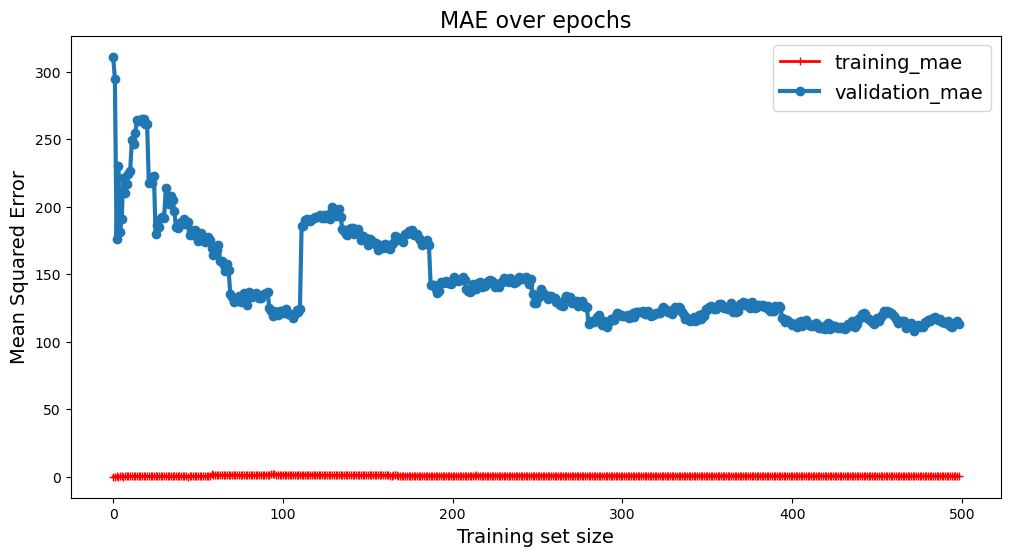

In [9]:



train_errors, val_errors = [], []

for i in range(1, 500):
    random_forest_model.fit(X_train[:i], y_train[:i])
    y_train_pred = random_forest_model.predict(X_train[:i])
    y_val_pred = random_forest_model.predict(X_val)
    train_errors.append(mean_absolute_percentage_error(y_train[:i], y_train_pred))
    val_errors.append(mean_absolute_percentage_error(y_val, y_val_pred))

# Plot the loss curves
plt.figure(figsize=(12, 6))
plt.plot(train_errors, "r-+", linewidth=2, label="training_mae")
plt.plot(val_errors, "o-", linewidth=3, label="validation_mae")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Training set size", fontsize=14)
plt.ylabel("Mean Squared Error", fontsize=14)
plt.title("MAE over epochs", fontsize=16)
plt.show()




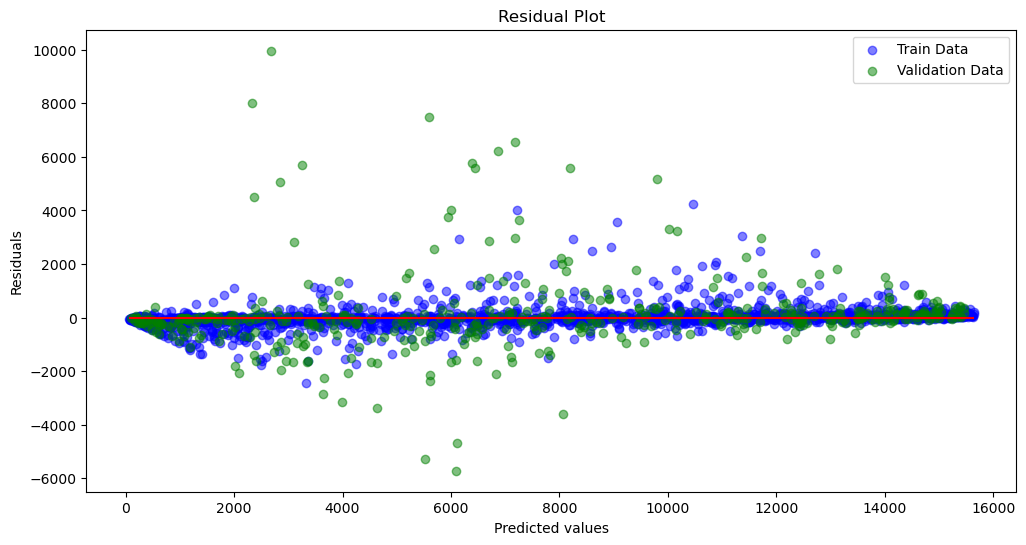

In [8]:
random_forest_model.fit(X_train, y_train)
y_train_pred = random_forest_model.predict(X_train)
y_val_pred = random_forest_model.predict(X_val)
train_residuals = y_train - y_train_pred
val_residuals = y_val - y_val_pred



plt.figure(figsize=(12, 6))
plt.scatter(y_train_pred, train_residuals, color='blue', label='Train Data', alpha=0.5)
plt.scatter(y_val_pred, val_residuals, color='green', label='Validation Data', alpha=0.5)
plt.hlines(y=0, xmin=min(y_train_pred), xmax=max(y_train_pred), color='red')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

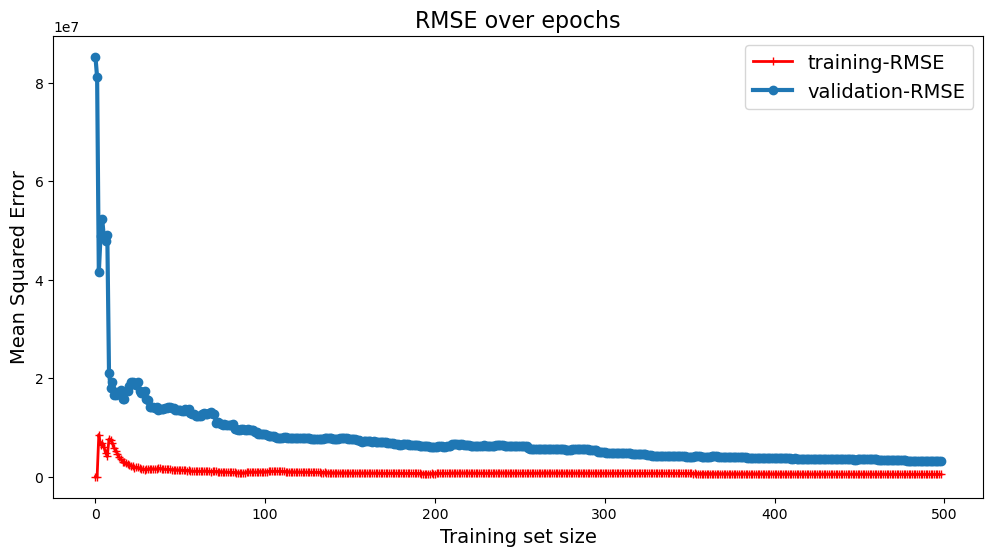

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(train_errors, "r-+", linewidth=2, label="training-RMSE")
plt.plot(val_errors, "o-", linewidth=3, label="validation-RMSE")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Training set size", fontsize=14)
plt.ylabel("Mean Squared Error", fontsize=14)
plt.title("RMSE over epochs", fontsize=16)
plt.show()

In [18]:
y_pred = random_forest_model.predict(X_test)

test_mse = mean_squared_error(y_test, y_pred)
test_mape = mean_absolute_percentage_error(y_test,y_pred)
test_rmse = sqrt(test_mse)
test_mae = mean_absolute_error(y_pred,y_test)

y_pred = random_forest_model.predict(X_train)

train_mse = mean_squared_error(y_train, y_pred)
train_mape = mean_absolute_percentage_error(y_train,y_pred)
train_rmse = sqrt(train_mse)
train_mae = mean_absolute_error(y_pred,y_train)

r2 = r2_score(y_train, y_pred)


print(f'test Root Mean Squared Error (RMSE): {test_rmse}')
print(f'test MAPE: {test_mape}')
print(f'train MAPE: {train_mape}')
print(f'train Root Mean Squared Error (RMSE): {train_rmse}')
print(f'train mae: {train_mae}')
print(f'test mae: {test_mae}')

print(f'R-squared (R²): {r2}')



test Root Mean Squared Error (RMSE): 2062.705166544888
test MAPE: 70.85387854451814
train MAPE: 54.41282468682487
train Root Mean Squared Error (RMSE): 1400.6332108899448
train mae: 862.0624113825785
test mae: 1303.0288436248181
R-squared (R²): 0.9269214610496395
